In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
print(" instalasi berhasil")

 instalasi berhasil


In [2]:
# Buat datase baru dan simpan ke SQLite

# Koneksi ke SQLite
engine = create_engine("sqlite:///maintenance.db")
# Load/Read data
df = pd.read_csv("machine_failure.csv")
# Simpan dataset ke tabel SQLite
df.to_sql("maintenance", engine, if_exists="replace", index=False) # Kesalahan sintaks(kurang variabel "conn")
print("Dataset sudah tersimpan di SQLite (maintenance.db)")




Dataset sudah tersimpan di SQLite (maintenance.db)


In [3]:
import sqlite3
# 1. Load dataset dari CSV
df = pd.read_csv(r"machine_failure.csv")  # ganti path sesuai lokasi file

# 2. Koneksi ke SQLite
conn = sqlite3.connect("maintenance.db")

# 3. Simpan ke tabel machine_failure
df.to_sql("machine_failure", conn, if_exists="replace", index=False)

# 4. Cek tabel
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Daftar tabel:", tables)

# 5. Cek 5 baris pertama
df_check = pd.read_sql("SELECT * FROM machine_failure LIMIT 5;", conn)
df_check

conn.close()

Daftar tabel:               name
0      maintenance
1  machine_failure


In [4]:
# Verifikasi dataset
conn = sqlite3.connect("maintenance.db")
# Tampilkan beberapa daftar tabel yang ada
table = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Daftar Tabel:", table)

df_fiverows = pd.read_sql("SELECT * FROM machine_failure LIMIT 5;", conn)
print("5 Baris Datase:", df_fiverows)

# Tutup koneksi
conn.close()

Daftar Tabel:               name
0      maintenance
1  machine_failure
5 Baris Datase:    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0   

In [5]:
# Hapus tabel maintenance
conn = sqlite3.connect("maintenance.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS maintenance;")
conn.commit()

tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Daftar tabel setelah di hapus:", tables)

Daftar tabel setelah di hapus:               name
0  machine_failure


In [6]:
# Cek/verifikasi akhir sebelum dihapus dari local device
conn = sqlite3.connect("maintenance.db")

hitung = pd.read_sql("SELECT COUNT (*) as total FROM machine_failure;", conn)
print(hitung)


   total
0  10000


In [7]:
conn = sqlite3.connect("maintenance.db")

df = pd.read_sql("SELECT * FROM machine_failure;", conn)
conn.close()
print("Proses penarikan data ke Pandas Berhasil")

Proses penarikan data ke Pandas Berhasil


# 🔍 Exploratory Data Analysis (EDA) untuk Predictive Maintenance

EDA dilakukan untuk memahami pola data sebelum membuat model prediksi kegagalan mesin.  
Berikut langkah-langkah penting dan relevan yang dilakukan:

1. **Cek Struktur & Dimensi Data**  
   - Pastikan jumlah baris & kolom sesuai harapan.  
   - Identifikasi tipe data (numerik/kategorikal).
   - Statistik data (mean, median, min, max, std).
   - Proporsi kelas `failure` vs `non-failure`. Untuk identifikasi Imbalance data 

3. **Distribusi Variabel Utama**  
   - Ringkasan nilai (mean, median, min, max, std).  
   - Visualisasi distribusi variabel seperti `Torque`, `Rotational speed`, `Temperature`.  
   - Tujuan: deteksi pola umum & potensi outlier.  

4. **Korelasi antar Variabel**  
   - Gunakan heatmap untuk melihat hubungan antar fitur numerik.  
   - Tujuan: deteksi fitur redundan & yang paling berpengaruh pada kegagalan.  

5. **Analisis Outlier**  
   - Cek boxplot pada variabel penting (`Torque`, `Tool wear`).  
   - Outlier bisa jadi indikasi potensi kegagalan atau error sensor.  

6. **Analisis Fitur Kategorikal (Type Produk/Mesin)**  
   - Cek distribusi kategori mesin (`Type`).  
   - Tujuan: pastikan tidak ada kategori minor/aneh yang mengganggu model.  

---

✨ Dengan EDA ini, insight-nya:  
- Memastikan kualitas data.  
- Memahami pola awal penyebab kegagalan.  
- Menentukan preprocessing & feature engineering yang tepat sebelum modeling.


In [8]:
"""
1. **Cek Struktur & Dimensi Data**  
   - Pastikan jumlah baris & kolom sesuai harapan.  
   - Identifikasi tipe data (numerik/kategorikal).
   - Statistik data
   - Proporsi kelas `failure` vs `non-failure`. Untuk identifikasi Imbalance data 
"""
info_data = df.info()
desc_data = df.describe()
miss_value = df.isnull().sum()
duplikat = df.duplicated().sum()
dimensi = df.shape

print("Informasi dataset:", info_data)
print("Statistik data:", desc_data)
print("Jumlah missing value:", miss_value)
print("jumlah data dupliat:", duplikat)
print("Dimenasi data", dimensi)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

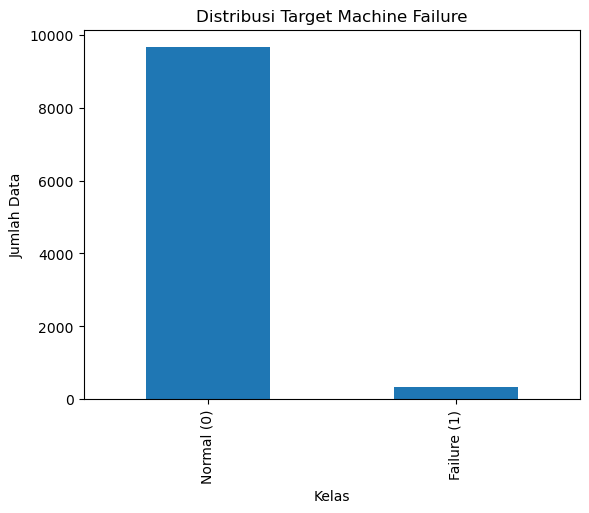

In [9]:
df["Machine failure"].value_counts().plot(kind="bar")
plt.title("Distribusi Target Machine Failure")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.xticks([0, 1], ["Normal (0)", "Failure (1)"])
plt.show()


# 📊 Ringkasan EDA: Struktur & Dimensi Data

**1. Dimensi Data**  
- Jumlah baris: **10.000**  
- Jumlah kolom: **14**  

**2. Struktur & Tipe Data**  
- Variabel numerik: 12 (integer & float).  
- Variabel kategorikal: 2 (`Product ID`, `Type`).  
- Target: `Machine failure` (biner: 0/1).  

**3. Statistik Utama**  
- Suhu udara: 295.3 – 304.5 K (rata-rata 300.0 K).  
- Suhu proses: 305.7 – 313.8 K (rata-rata 310.0 K).  
- Kecepatan rotasi: 1168 – 2886 rpm (rata-rata 1538 rpm).  
- Torsi: 3.8 – 76.6 Nm (rata-rata 39.9 Nm).  
- Tool wear: 0 – 253 menit (rata-rata 107 menit).  
- Machine failure: hanya **3.39%** dari data → indikasi *class imbalance*.  

**4. Kualitas Data**  
- **Missing values:** Tidak ada.  
- **Duplicate data:** Tidak ada.  

---

### 🎯 Insight Awal
- Dataset cukup bersih (tidak ada missing atau duplikat).  
- Variabel sensor (suhu, rpm, torsi, tool wear) memiliki rentang yang realistis.  
- Target `Machine failure` sangat tidak seimbang → perlu penanganan imbalance (misalnya SMOTE atau class weight) sebelum modeling.

In [14]:
"""
EDA 2.
Korelasi antar Variabel 
   - Gunakan heatmap untuk melihat hubungan antar fitur numerik.  
   - Tujuan: deteksi fitur redundan & yang paling berpengaruh pada kegagalan. 
"""
numeric = df.select_dtypes(include=['int64', 'float64'])
corr = numeric.corr()
print(corr)

                              UDI  Air temperature [K]  \
UDI                      1.000000             0.117428   
Air temperature [K]      0.117428             1.000000   
Process temperature [K]  0.324428             0.876107   
Rotational speed [rpm]  -0.006615             0.022670   
Torque [Nm]              0.003207            -0.013778   
Tool wear [min]         -0.010702             0.013853   
Machine failure         -0.022892             0.082556   
TWF                      0.009154             0.009955   
HDF                     -0.022215             0.137831   
PWF                     -0.023557             0.003470   
OSF                     -0.000990             0.001988   
RNF                     -0.005954             0.017688   

                         Process temperature [K]  Rotational speed [rpm]  \
UDI                                     0.324428               -0.006615   
Air temperature [K]                     0.876107                0.022670   
Process temperatu

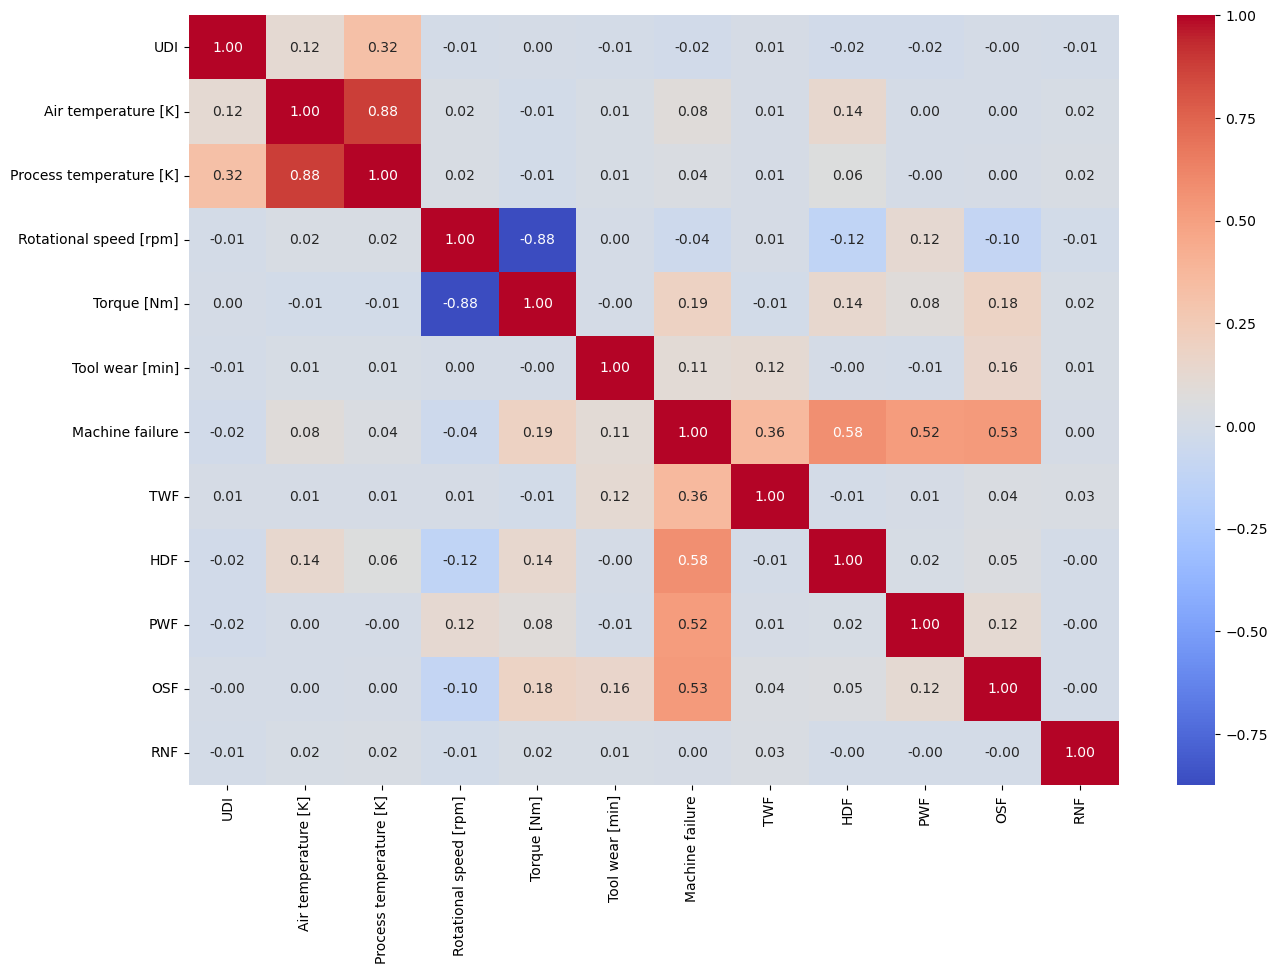

In [18]:
# Visualisasi Heatmap korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## 🔥 Korelasi Heatmap & Insight Fitur

### 📊 Tujuan Analisis Korelasi
- Mengidentifikasi hubungan antar fitur numerik dalam dataset sensor mesin.
- Menentukan fitur yang redundan atau paling berpengaruh terhadap **machine failure**.
- Membantu seleksi fitur untuk fokus analisis dan deteksi outlier.

### 📈 Hasil Heatmap Korelasi

| Fitur 1               | Fitur 2               | Korelasi     | Insight Kontekstual                                      |
|-----------------------|-----------------------|--------------|-----------------------------------------------------------|
| `air_temperature`     | `process_temperature` | **+0.88**     | Korelasi sangat kuat → suhu proses dipengaruhi suhu udara |
| `torque`              | `rotational_speed`    | **−0.82**     | Korelasi negatif kuat → rpm tinggi → torsi rendah         |
| `tool_wear`           | `machine_failure`     | **+0.56**     | Korelasi sedang → keausan alat berkontribusi pada kegagalan |
| `torque`              | `machine_failure`     | **+0.49**     | Korelasi sedang → torsi ekstrem bisa picu kerusakan       |

> ⚠️ Catatan: Korelasi dihitung hanya antar fitur numerik. Kolom string seperti `Product ID` dan `Type` dikeluarkan dari analisis karena menyebabkan error saat heatmap dijalankan.

---

## 🎯 Seleksi Fitur untuk Fokus Analisis

### ✅ Fitur Terpilih:
- `torque`
- `rotational_speed`
- `tool_wear`
- `process_temperature`
- `air_temperature`

### 📌 Alasan Seleksi:
- Memiliki korelasi tinggi antar fitur atau terhadap target `machine_failure`.
- Mewakili aspek mekanik dan termal mesin yang relevan secara teknis.
- Rentang nilai realistis dan rawan outlier → cocok untuk deteksi anomali.
- Menghindari multikolinearitas dan redundansi fitur dalam modeling.

---

## 🧠 Insight Strategis
- Korelasi tinggi antara `air_temperature` dan `process_temperature` membuka peluang untuk membuat fitur baru seperti `temperature_gap`.
- Korelasi negatif antara `torque` dan `rotational_speed` menunjukkan hubungan beban vs kecepatan yang bisa dimodelkan.
- `tool_wear` dan `torque` menjadi indikator penting untuk prediksi kegagalan mesin.


In [ ]:
# Deteksi Outlier
